<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

# Synopsis

Some of the following content may be quite advanced if you have no background in statistics.

Do not panic about this, just be aware that there are some very fast and efficient libraries available for number crunching using python.

This notebook will explain the following topics and concepts:

- **Built in Statistical Functions** 

- **Correlation & Covariance**

- **Function application**
  - Applying a function to rows of a DataFrame

- **Common Front Office Calculations**
  - Normalized prices
  - the log of returns
  - Daily Percentage Change
  - Cumulative returns
  - macd - Moving Average Convergence/Divergence



# Built in Statistical Functions

The following functions can all be applied to a Series.

As a column is a Series, they can all be applied to a column or columns of a DataFrame or even an entire DataFrame

- Simple Functions
- Accumulators
- General Purpose Functions

In [2]:
# Import pandas, numpy, matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# call the matplotlib inline magic
%matplotlib inline

## Simple Functions


- count() 
- min() 
- max() 
- sum() 
- mean()
- median() 
- std() 
- describe()

In [3]:
# Create a demonstration Series and call some of it's aggregation functions
tmp = pd.Series([13,2,4,24,9,25,6,50])

# Use print to display the result of each function
# count, min, max, sum, mean, mediam, std
print('count:',tmp.count())
print('min:',tmp.min())
print('max:',tmp.max())
print('sum:',tmp.sum())
print('mean:',tmp.mean())
print('median:',tmp.median())
print('std:',tmp.std())



count: 8
min: 2
max: 50
sum: 133
mean: 16.625
median: 11.0
std: 16.017289765393254


In [4]:
# describe() gives a number of statistical values in one function
tmp.describe()

count     8.00000
mean     16.62500
std      16.01729
min       2.00000
25%       5.50000
50%      11.00000
75%      24.25000
max      50.00000
dtype: float64

## accumulators

- cumsum()
- cummin()
- cummax()
- cumprod()

In [17]:
# Use print to display the result of each function ('\n' inserts a new line for readability)
# cumsum, cummin, cummax, cumprod
print('cumsum:\n',tmp.cumsum())
print('cummin:\n',tmp.cummin())
print('cummax:\n',tmp.cummax())
print('cumprod:\n',tmp.cumprod())

cumsum:
 0     13
1     15
2     19
3     43
4     52
5     77
6     83
7    133
dtype: int64
cummin:
 0    13
1     2
2     2
3     2
4     2
5     2
6     2
7     2
dtype: int64
cummax:
 0    13
1    13
2    13
3    24
4    24
5    25
6    25
7    50
dtype: int64
cumprod:
 0           13
1           26
2          104
3         2496
4        22464
5       561600
6      3369600
7    168480000
dtype: int64


## General purpose Functions

There are also a few general purpose functions

- diff()  - difference between adjacent values
- pct_change() - percentage change between adjacent values
- idxmin() - numerical index of minimum value in series (Series begin at index 0)
- idxmax() - numerical index of maximum value in series
- skew() (unbiased skew <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html">docs</a>)
- kurt() (unbiased kurtosis <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html">docs</a>)
- quantile() (returns values at the given quantile <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html">docs</a>)

In [5]:
# Use print to display the result of each function ('\n' inserts a new line for readability)
# diff, pct_change, idxmin, idxmax, skew, kurt, quantile
print('diff:\n',tmp.diff())
print('pct_change:\n',tmp.pct_change())
print('idxmin:',tmp.idxmin())
print('idxmax:',tmp.idxmax())
print('skew:',tmp.skew())
print('kurt:',tmp.kurt())
print('quantile:',tmp.quantile())


diff:
 0     NaN
1   -11.0
2     2.0
3    20.0
4   -15.0
5    16.0
6   -19.0
7    44.0
dtype: float64
pct_change:
 0         NaN
1   -0.846154
2    1.000000
3    5.000000
4   -0.625000
5    1.777778
6   -0.760000
7    7.333333
dtype: float64
idxmin: 1
idxmax: 7
skew: 1.4524005564431457
kurt: 2.059695914294438
quantile: 11.0


# Import Data

In [27]:
!pip install pandas
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 37.7 MB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.8 MB/s 


In [6]:
# Load in the famous FANG stocks, make sure the index is the Date and it's sorted ascending
df_FB = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls', sheet_name='FB', parse_dates=True, index_col='Date')
df_AMZN = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls', sheet_name='AMZN', parse_dates=True, index_col='Date')
df_AAPL = pd.read_excel(io='https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/market_data.xls', sheet_name='AAPL', parse_dates=True, index_col='Date')

# Common Front Office Calculations


**Common Front Office Calculations**
- Normalized prices
- the log of returns
- Daily Percentage Change
- Cumulative returns
- macd - Moving Average Convergence/Divergence

## Visualizing Returns

### 1 - Look at the  Closing Prices

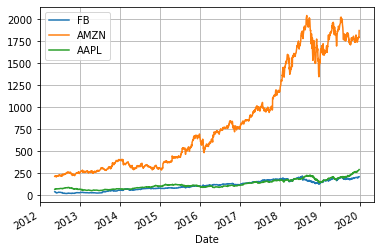

In [9]:
# plot the Adj Close column
df = pd.DataFrame()
df['FB'] = df_FB['Adj Close']
df['AMZN'] = df_AMZN['Adj Close']
df['AAPL'] = df_AAPL['Adj Close']

df.plot(grid=True)

### 2 - Look at Normalized Prices

The difference between price(t0) and price (t+1)

This is the same as cumulative daily returns

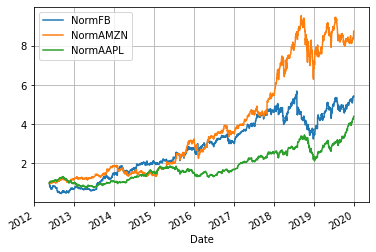

In [11]:
# fill in this cell
df['NormFB'] = df['FB']/df.iloc[0]['FB']
df['NormAMZN'] = df['AMZN']/df.iloc[0]['AMZN']
df['NormAAPL'] = df['AAPL']/df.iloc[0]['AAPL']
cols = ['NormFB','NormAMZN','NormAAPL']

df[cols].plot(grid=True)

### 3 - Look at Returns

- When calculating the return of an investment or position, the product of daily returns can be used.

- This allows a direct comparison to be made between different instruments

- This is a very simple value to arrive at

- price / price(t-1)

- price(t-1) arrived at by using the time shift functions

- Use the `cumprod()` function to arrive at the payoff



Date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
Name: FB, dtype: float64

Date
2012-05-18          NaN
2012-05-21    38.230000
2012-05-22    34.029999
2012-05-23    31.000000
2012-05-24    32.000000
Name: FB, dtype: float64

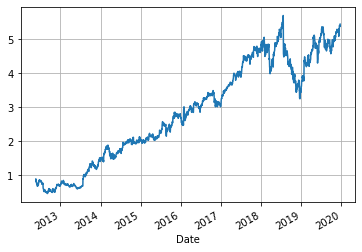

In [14]:
# demonstrate the shift function
display(df['FB'].head())
display(df['FB'].shift(1).head())
(df['FB']/df['FB'].shift(1)).cumprod().plot(grid=True)

In [15]:
# fill in this cell
df['ReturnsFB'] = df['FB']/df['FB'].shift(1)

### 4 - Look at the Log of the Daily Returns

- Log of returns is time additive and so can summed over any periods. (<a href="https://www.youtube.com/watch?v=PtoUlt3V0CI" target="_blank">Brief explanation of log of returns</a>)

- Used more frequently than product of returns (above)

- When calculating the return of an investment or position, an accumulation of the log of daily returns is used.

- This allows a direct comparison to be made between different instruments

- This is a very simple value to arrive at

- log (price / price(t-1))

- Use a combination of np.log and the time shift functions

- Use the **cumsum()** function to arrive at the payoff

- Where there is a choice between adjusted and unadjusted, use the Adjusted values (e.g. AdjOpen, AdjVolume, etc.)


- Note the use of the `apply` function - this sends every value in a column to another function. In this case we send every value to the numpy `exp` function.

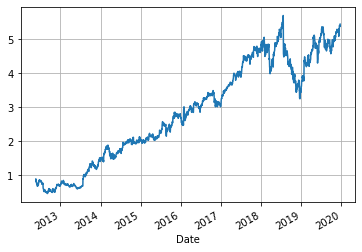

In [17]:
# Returns for Facebook
# Have the Adjusted Close so use that
# Plot returns for both for a direct comparison
# applying the exponential function to the accumulator
# Very very common in financial analysis
# we're using np.exp to get the exponential of the cumulative sum for plotting

df['LogReturnsFB'] = np.log(df['FB']/df['FB'].shift(1))
df['LogReturnsFB'].cumsum().apply(np.exp).plot(grid=True)


### 5 - Look at Cumulative Returns

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Reached by multiplying previous investment at i at t-1 by 1+ percent returns. <BR>
Easy to calculate using pandas with its `cumprod()` method. 


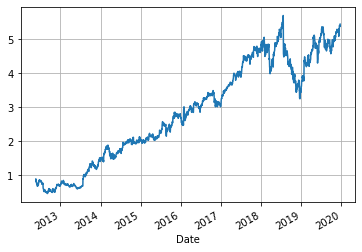

In [18]:
# fill in this cell
df['CumulativeReturnsFB'] = (1+df['FB'].pct_change()).cumprod()
df['CumulativeReturnsFB'].head()
df['CumulativeReturnsFB'].plot(grid=True)

## Daily Percentage Change

Defined by the following formula: $ r_t = \frac{p_t}{p_{t-1}} -1$ <BR>
    
>
> The percent gain (or loss) if you bought the stock on day and then sold it the next day. <BR>
> Very useful in analyzing the volatility of the stock. <BR>
> A wide distribution implies the stock is more volatile from one day to the next<BR>
>
    
2 Methods
- Use `shift()`
- Use built in `pct_change()`

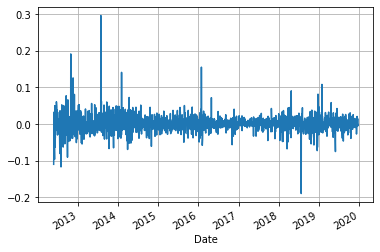

In [19]:
# Using Shift
df['DailyPercentShiftFB'] = (df['FB']/df['FB'].shift(1))-1
df['DailyPercentShiftFB'].plot(grid=True)

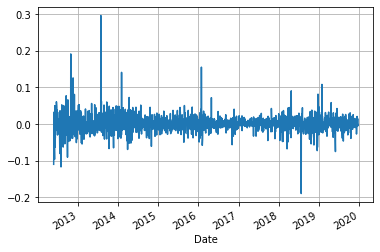

In [20]:
# Using pct_change
df['DailyPercentFB'] = df['FB'].pct_change()
df['DailyPercentFB'].plot(grid=True)

## MACD

A quick reminder...

Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

- Turns two moving averages into a momentum oscillator by subtracting the longer moving average from the shorter moving average. 
- Results in the best of both worlds: trend following and momentum.
- MACD formula : (12-day EMA - 26-day EMA)
- Uses the pandas ewma function (exponentially weighted moving average) (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html" target="_blank">Pandas documentation - ewm</a>)

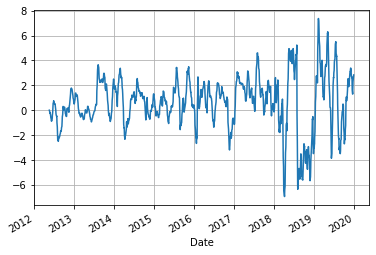

In [22]:
# Facebook 2017
# plot MACD
df_MACD = pd.DataFrame()
#Calculate 12d EMA,26d EMA, MACD
df_MACD['12d'] = df['FB'].ewm(span=12).mean()
df_MACD['26d'] = df['FB'].ewm(span=26).mean()

df_MACD['MACD'] = df_MACD['12d'] - df_MACD['26d']
df_MACD['MACD'].plot(grid=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


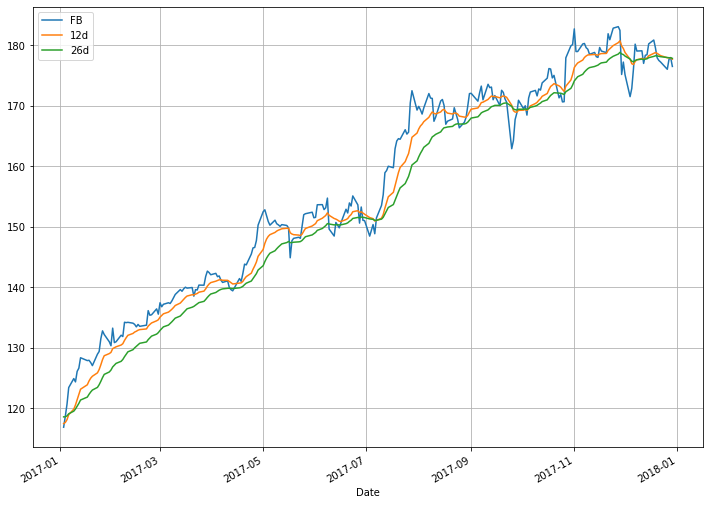

In [24]:
# plot relationship between Close prices, 12 ewm and 26 ewm
df_MACD['FB']=df['FB']
cols = ['FB','12d','26d']
df_MACD[cols]['2017'].plot(grid=True,figsize=(12,9))

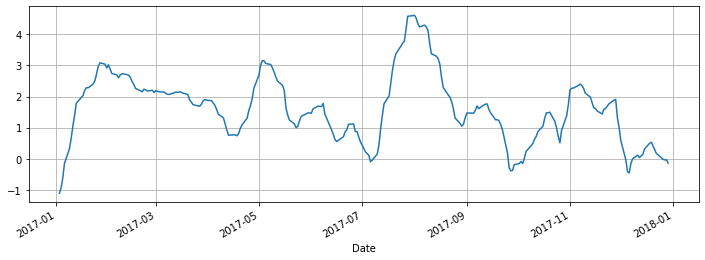

In [25]:
df_MACD['MACD']['2017'].plot(grid=True,figsize=(12,4))

# Correlation and Co-Variance

A quick reminder....

Covariance measures whether a variation in one variable results in a variation in another variable; for example, looking at whether an increase in one variable results in an increase, decrease, or no change in the other variable.

Correlation measures the direction as well as the strength of the relationship between two variables (i.e. how strongly these two variables are related to each other).

- Pandas has some convenient built-ins for calculating these.

- We'll Use some previous datasets for demonstration.

- Calculate the correlation and covariance between the daily percentage change of the Adjusted Close price of FANG Stocks and Gold Futures.

- Display the correlation

- Calculate the covariance of the same data

In [26]:
# get pct change of FB, Apple and Amazon
df_CORR = pd.DataFrame()

df_CORR['Facebook'] = df_FB['Close'].pct_change()
df_CORR['Apple'] = df_AAPL['Close'].pct_change()
df_CORR['Amazon'] = df_AMZN['Close'].pct_change()

df_CORR.head()

,Facebook,Apple,Amazon
Date,,,
2012-05-18,NaN,0.000490,-0.020654
2012-05-21,-0.109861,0.058260,0.019920
2012-05-22,-0.089039,-0.007679,-0.012746
2012-05-23,0.032258,0.024400,0.009056
2012-05-24,0.032187,-0.009184,-0.009389


## Calculate correlation and covariance

- Use the **corr()** function
- Use the **cov()** function



In [29]:
# OR for a more recent correlation
# Covariance
df_CORR.corr()


,Facebook,Apple,Amazon
Facebook,1.000000,0.286105,0.400248
Apple,0.286105,1.000000,0.376459
Amazon,0.400248,0.376459,1.000000


In [30]:
df_CORR['2017'].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Facebook,Apple,Amazon
Facebook,1.000000,0.544823,0.653030
Apple,0.544823,1.000000,0.511137
Amazon,0.653030,0.511137,1.000000


In [31]:
df_CORR['2017'].cov()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Facebook,Apple,Amazon
Facebook,0.000115,0.000065,0.000092
Apple,0.000065,0.000124,0.000075
Amazon,0.000092,0.000075,0.000174


## Use a scatter plot to display a visual of correlation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


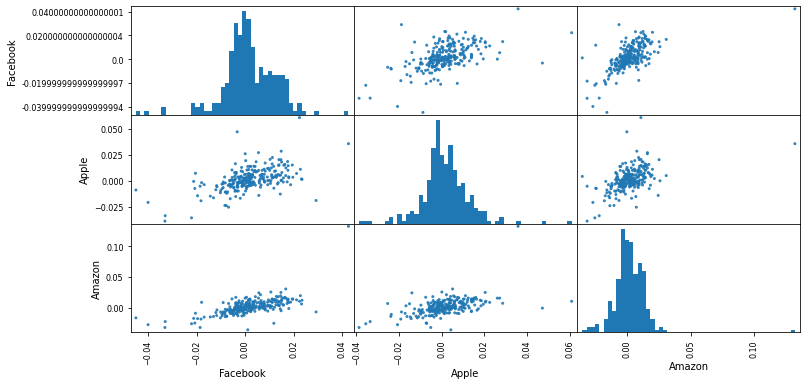

In [33]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(df_CORR['2017'], alpha=0.9, hist_kwds={'bins':50}, figsize=(12,6))


## Rolling Correlations

Here we're using the `rolling` function from Pandas. This gives a rolling window over the last X samples. An aggregate function can then be applied to that rolling window.

Similar to the cumulative functions (cumsum, cumprod etc.) However in this case the window size remains fixed.

In [36]:
# get sum of a rolling window of size 3
df_tmp = df_CORR['Facebook']
df_tmp['RollingSum'] = df_CORR[['Facebook']].rolling(3).sum()
display(df_tmp['RollingSum'].head(6))
display(df_CORR['Facebook'].head(6))

,Facebook
Date,
2012-05-18,NaN
2012-05-21,NaN
2012-05-22,NaN
2012-05-23,-0.166642
2012-05-24,-0.024594
2012-05-25,0.030537


Date
2012-05-18         NaN
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032187
2012-05-25   -0.033909
Name: Facebook, dtype: float64

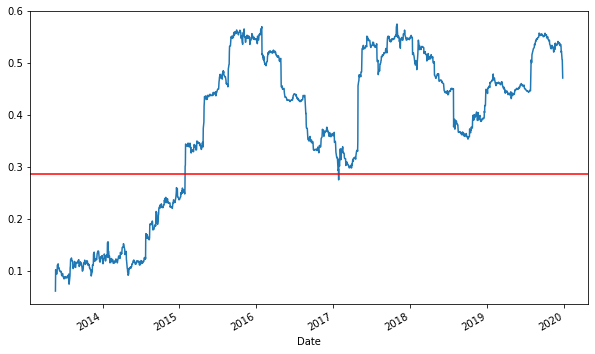

In [40]:
## Rolling Correlations
# This line shows the corralation of Facebook and Apple over the entire time period
# Note how the rolling correlation is much more telling
ax = df_CORR['Facebook'].rolling(window=252).corr(df_CORR['Apple']).plot(figsize=(10,6))
ax.axhline(df_CORR.corr().iloc[0,1],c='r')

## Rolling Covariances

In [ ]:
## Rolling Covarianbce
# This line shows the covariance of Facebook and Apple over the entire time period
# Note how the rolling covariance is much more telling
